In [2]:
import cv2 as cv
import dlib as dl
import numpy as np 
import matplotlib.pyplot as plt
import os

haar_cascade = cv.CascadeClassifier('haar_face.xml')
predictor = dl.shape_predictor('shape_predictor_68_face_landmarks.dat')


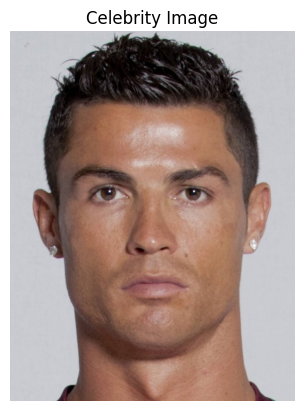

In [3]:
# Load the celebrity image and convert it to grayscale
celebrity_img = cv.imread("ronaldo.jpeg")
celebrity_gray = cv.cvtColor(celebrity_img, cv.COLOR_BGR2GRAY)

# Plot the celebrity image
plt.imshow(cv.cvtColor(celebrity_img, cv.COLOR_BGR2RGB))
plt.title("Celebrity Image")
plt.axis('off')
plt.show()


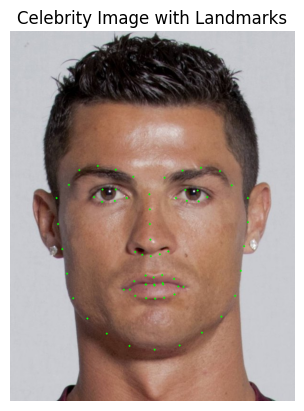

In [4]:
# Detect the face in the celebrity image using Haar cascade
celebrity_faces = haar_cascade.detectMultiScale(celebrity_gray, 1.1, 4)
if len(celebrity_faces) == 0:
    raise Exception("No faces detected in the celebrity image.")
(x, y, w, h) = celebrity_faces[0]
rect = dl.rectangle(x, y, x + w, y + h)
celebrity_landmarks = predictor(celebrity_gray, rect)

# Extract the landmarks as NumPy arrays
celebrity_points = np.array([[p.x, p.y] for p in celebrity_landmarks.parts()])

# Plot the landmarks on the celebrity image
img_with_landmarks = celebrity_img.copy()
for (x, y) in celebrity_points:
    cv.circle(img_with_landmarks, (x, y), 2, (0, 255, 0), -1)

plt.imshow(cv.cvtColor(img_with_landmarks, cv.COLOR_BGR2RGB))
plt.title("Celebrity Image with Landmarks")
plt.axis('off')
plt.show()


[ WARN:0@184.863] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@184.865] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range


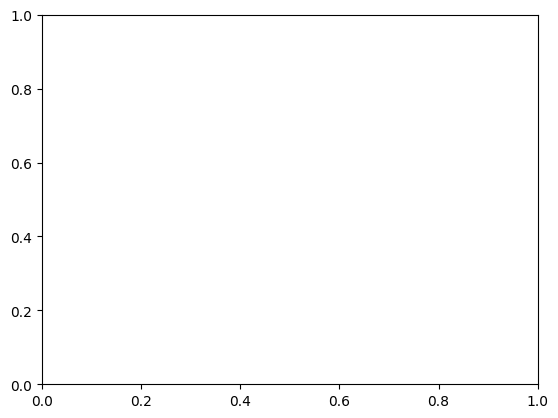

In [6]:
def apply_filter(frame):
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = haar_cascade.detectMultiScale(gray, 1.1, 4)
    
    for (x, y, w, h) in faces:
        rect = dl.rectangle(x, y, x + w, y + h)
        landmarks = predictor(gray, rect)
        points = np.array([[p.x, p.y] for p in landmarks.parts()])
        
        # Calculate the transformation matrix and apply it to the celebrity image
        h, status = cv.findHomography(celebrity_points, points)
        warped_img = cv.warpPerspective(celebrity_img, h, (frame.shape[1], frame.shape[0]))
        
        # Create a mask for blending
        mask = np.zeros_like(gray)
        cv.fillConvexPoly(mask, points, 255)
        warped_mask = cv.warpPerspective(mask, h, (frame.shape[1], frame.shape[0]))
        warped_mask = cv.cvtColor(warped_mask, cv.COLOR_GRAY2BGR)
        
        # Blend the images
        frame = cv.addWeighted(frame, 1.0, warped_img, 0.7, 0)
        frame[warped_mask > 0] = warped_img[warped_mask > 0]
    
    return frame

# Open the webcam
cap = cv.VideoCapture(0)

plt.ion()
fig, ax = plt.subplots()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = apply_filter(frame)
    
    ax.clear()
    ax.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    ax.set_title("Deep Fake Filter")
    ax.axis('off')
    plt.draw()
    plt.pause(0.001)
    
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()


In [10]:
import cv2

# Function to list all available video devices
def list_video_devices():
    index = 0
    arr = []
    while True:
        cap = cv2.VideoCapture(index)
        if not cap.read()[0]:
            break
        else:
            arr.append(index)
        cap.release()
        index += 1
    return arr

print("Available video devices:", list_video_devices())


Available video devices: []


[ WARN:0@266.690] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@266.690] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
